In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [3]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True)
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


**<h3>EDA</h3>**

In [4]:
data.shape

(42, 2)

In [5]:
data.ndim

2

In [6]:
data.isna().sum()

Quarter    0
Sales      0
dtype: int64

**<h3>Visualization</h3>**

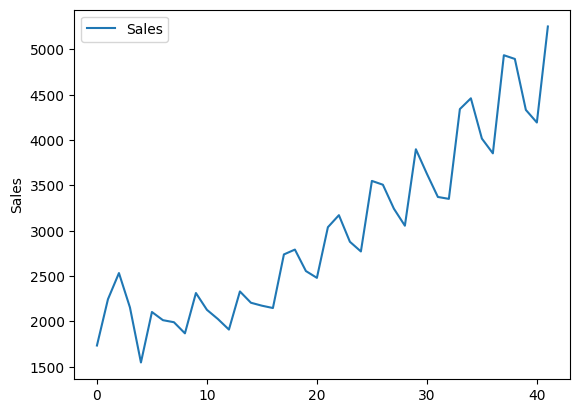

In [7]:
data.plot()
plt.ylabel('Sales')
plt.show()

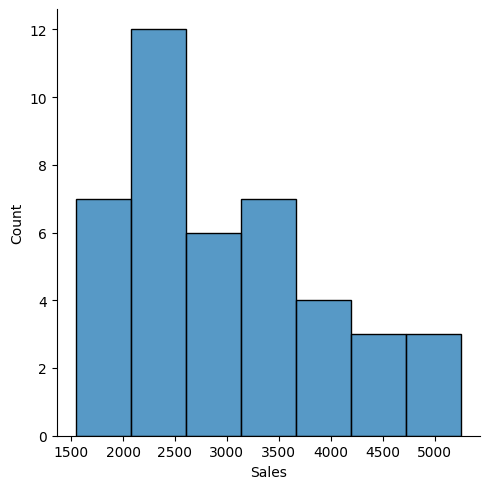

In [8]:
import seaborn as sns
sns.displot(data['Sales'])
plt.show()

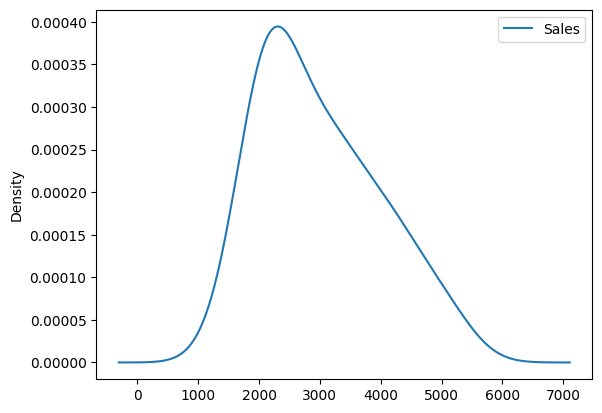

In [9]:
data.plot(kind = 'kde')
plt.show()

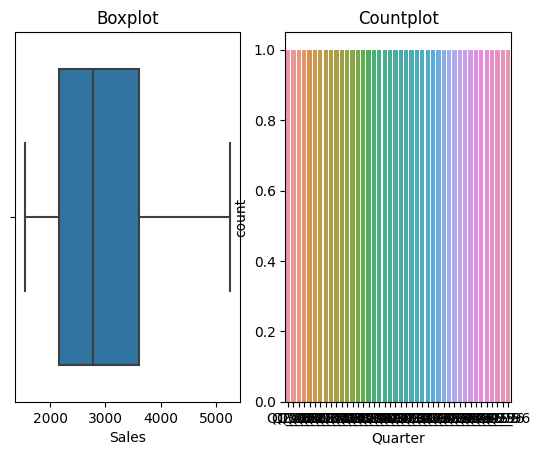

In [10]:
plt.subplot(1,2,1)
sns.boxplot(x = 'Sales', data = data); plt.title("Boxplot")
plt.subplot(1,2,2)
sns.countplot(x = 'Quarter', data = data); plt.title("Countplot")
plt.show()

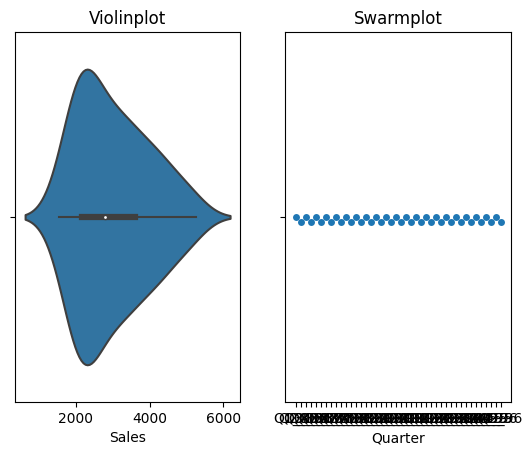

In [11]:
plt.subplot(1,2,1)
sns.violinplot(x = 'Sales', data = data); plt.title("Violinplot")
plt.subplot(1,2,2)
sns.swarmplot(x = 'Quarter', data = data); plt.title("Swarmplot")
plt.show()

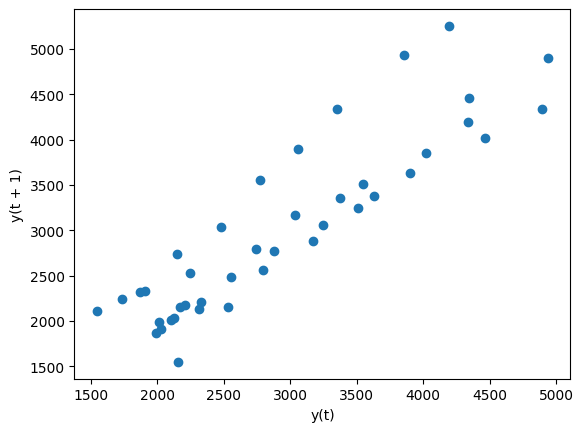

In [12]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])
plt.show()

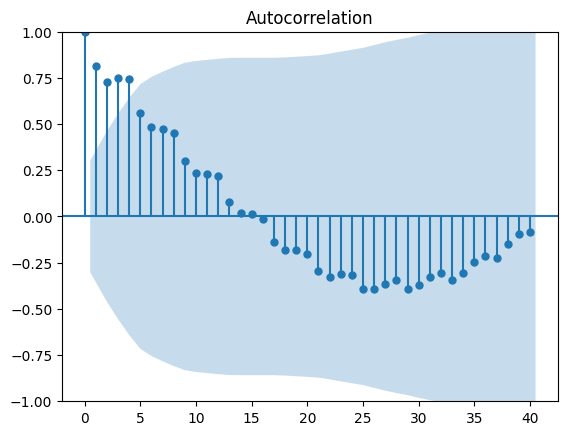

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Sales'],lags=40)
plt.show()

In [14]:
np.array(data["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

In [15]:
# Extracting the quarters and putting in column
data['quarter'] = 0
for i in range(42):
    p=data['Quarter'][i]
    data['quarter'][i]=p[0:2]

In [16]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [17]:
# Creat dummy variables for quarters variable
df_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([data,df_dummies],axis= 1)

In [18]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [19]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [20]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [21]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(data['Sales'])

In [22]:
cc.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [23]:
train =cc.head(32)
test =cc.tail(10)

**<h3>Model</h3>**

In [24]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [25]:
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767116

In [26]:
# Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.735735540752

In [27]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [28]:
# Comparing the results
Data = {"MODEL":pd.Series(["RMSE_LINEAR","RMSE_EXP","RMSE_QUAD"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(Data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,RMSE_QUAD,457.735736
0,RMSE_LINEAR,752.923393
1,RMSE_EXP,4387.940545


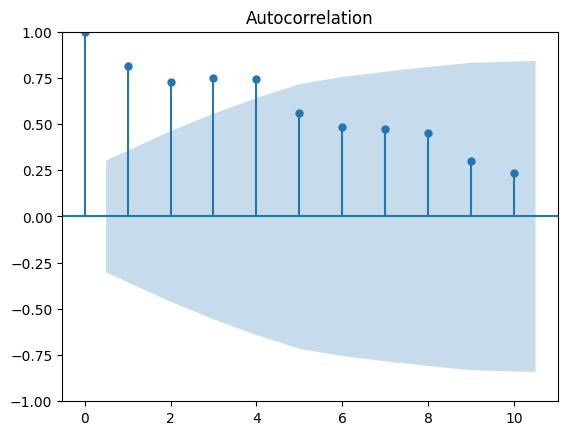

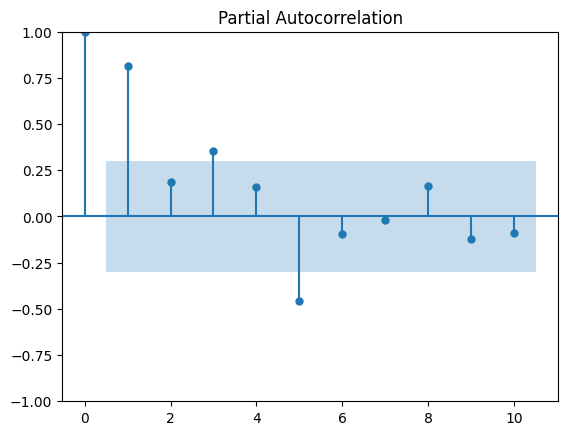

In [29]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales, lags=10)
tsa_plots.plot_pacf(data.Sales, lags=10)
plt.show()

**<h3>Using ARIMA model</h3>**

In [30]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col= 0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [31]:
# Separate out a validation dataset
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [32]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [33]:
from math import sqrt
train = pd.read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [34]:
# Prepare data
X = train.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

**<h3>Validation</h3>**

In [35]:
# walk forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)

# Observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Report Performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [36]:
data = {"MODEL":pd.Series(["RMSE_LINEAR","RMSE_EXP","RMSE_QUAD","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,RMSE_QUAD,457.735736
0,RMSE_LINEAR,752.923393
1,RMSE_EXP,4387.940545


**Conclusion:**

 RMSE Value of ARIMA model is less than others, so we can finalise ARIMA model.